<a href="https://colab.research.google.com/github/mpantonucci/Bootcamp-DataScience/blob/main/Desafio%20-%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


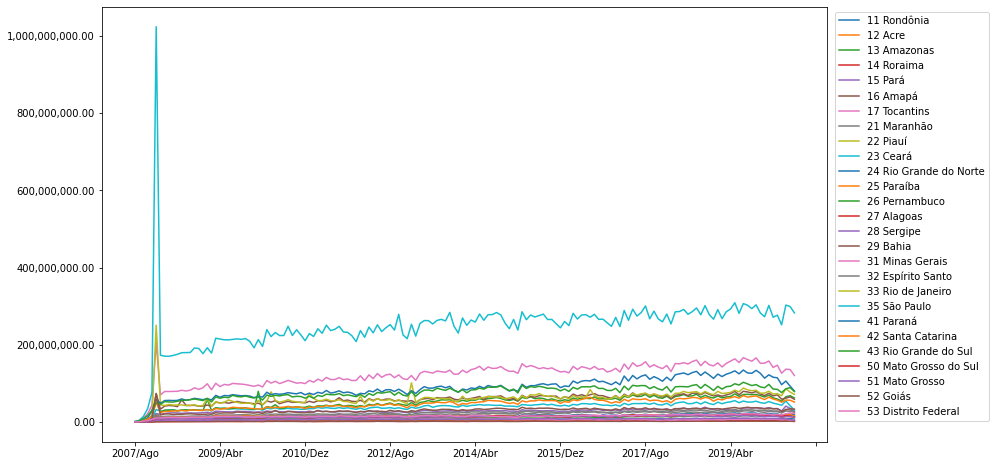

In [28]:
descricao_col_unfederacao = "Unidade da Federação"
descricao_col_coltotal    = "Total"
dados = pd.read_csv("/content/A160324189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")
colunas_valores_preenchidos = dados.mean().index.tolist()
colunas_valores_preenchidos.insert(0, descricao_col_unfederacao)
dados_valores_preenchidos =  dados[colunas_valores_preenchidos].set_index(descricao_col_unfederacao)
dados_valores_preenchidos = dados_valores_preenchidos.drop(descricao_col_coltotal, axis=1)
ax = dados_valores_preenchidos.T.plot(figsize=(13,8))
ax.legend(loc="upper right", bbox_to_anchor=(1.23, 1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))



